In [ ]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem

temp = FuzzyInputVariable('Temperature', 10, 40, 100)
temp.add_triangular('Cold', 10, 10, 25)
temp.add_triangular('Medium', 15, 25, 35)
temp.add_triangular('Hot', 25, 40, 40)

humidity = FuzzyInputVariable('Humidity', 20, 100, 100)
humidity.add_triangular('Wet', 20, 20, 60)
humidity.add_trapezoidal('Normal', 30, 50, 70, 90)
humidity.add_triangular('Dry', 60, 100, 100)

motor_speed = FuzzyOutputVariable('Speed', 0, 100, 100)
motor_speed.add_triangular('Slow', 0, 0, 50)
motor_speed.add_triangular('Moderate', 10, 50, 90)
motor_speed.add_triangular('Fast', 50, 100, 100)

system = FuzzySystem()
system.add_input_variable(temp)
system.add_input_variable(humidity)
system.add_output_variable(motor_speed)

system.add_rule(
		{ 'Temperature':'Cold',
			'Humidity':'Wet' },
		{ 'Speed':'Slow'})

system.add_rule(
		{ 'Temperature':'Cold',
			'Humidity':'Normal' },
		{ 'Speed':'Slow'})

system.add_rule(
		{ 'Temperature':'Medium',
			'Humidity':'Wet' },
		{ 'Speed':'Slow'})

system.add_rule(
		{ 'Temperature':'Medium',
			'Humidity':'Normal' },
		{ 'Speed':'Moderate'})

system.add_rule(
		{ 'Temperature':'Cold',
			'Humidity':'Dry' },
		{ 'Speed':'Moderate'})

system.add_rule(
		{ 'Temperature':'Hot',
			'Humidity':'Wet' },
		{ 'Speed':'Moderate'})

system.add_rule(
		{ 'Temperature':'Hot',
			'Humidity':'Normal' },
		{ 'Speed':'Fast'})

system.add_rule(
		{ 'Temperature':'Hot',
			'Humidity':'Dry' },
		{ 'Speed':'Fast'})

system.add_rule(
		{ 'Temperature':'Medium',
			'Humidity':'Dry' },
		{ 'Speed':'Fast'})

output = system.evaluate_output({
				'Temperature':18,
				'Humidity':60
		})

print(output)
print(type(output))
# print('fuzzification\n-------------\n', info['fuzzification'])
# print('rules\n-----\n', info['rules'])

system.plot_system()

In [ ]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem


class FuzzyStackLogic():

	def __init__(self):
		stack_height = FuzzyInputVariable('stack_height', 0, 6, 100)
		stack_height.add_triangular('Low', 0, 0, 2)
		stack_height.add_triangular('Medium', 0, 3, 4)
		stack_height.add_triangular('High', 3, 6, 6)

		etd = FuzzyInputVariable('ETD', 0, 1, 100)
		etd.add_triangular('Earlier', 0, 0, 0.6)
		etd.add_triangular('Later', 0.4, 1, 1)

		stack_VoG = FuzzyOutputVariable('stack_VoG', 0, 1, 100)
		stack_VoG.add_triangular('Small', 0, 0, 0.4)
		stack_VoG.add_triangular('Medium', 0.1, 0.5, 0.9)
		stack_VoG.add_triangular('High', 0.6, 1, 1)

		system = FuzzySystem()
		system.add_input_variable(stack_height)
		system.add_input_variable(etd)
		system.add_output_variable(stack_VoG)

		system.add_rule(
				{ 'stack_height':'Low',
					'ETD':'Later' },
				{ 'stack_VoG':'Small'})

		system.add_rule(
				{ 'stack_height':'Medium',
					'ETD':'Later' },
				{ 'stack_VoG':'Small'})

		system.add_rule(
				{ 'stack_height':'Medium',
					'ETD':'Earlier' },
				{ 'stack_VoG':'High'})

		system.add_rule(
				{ 'stack_height':'High',
					'ETD':'Earlier' },
				{ 'stack_VoG':'Medium'})

	def calculate_VoG(self, stack_height, ETD):
		output = system.evaluate_output({
						'stack_height':stack_height,
						'ETD':ETD
				})

		return output['stack_VoG']
	
class FuzzyBlockLogic():

	def __init__(self):
		block_utilization = FuzzyInputVariable('block_utilization', 0, 1, 100)
		block_utilization.add_triangular('Low', 0, 0, 0.4)
		block_utilization.add_triangular('Medium', 0.1, 0.5, 0.9)
		block_utilization.add_triangular('High', 0.6, 1, 1)

		block_VoG = FuzzyOutputVariable('block_VoG', 0, 1, 100)
		block_VoG.add_triangular('Low', 0, 0, 0.4)
		block_VoG.add_triangular('Medium', 0, 0.5, 1)
		block_VoG.add_triangular('High', 0.6, 1, 1)

		system = FuzzySystem()
		system.add_input_variable(block_utilization)
		system.add_output_variable(block_VoG)

		system.add_rule(
				{ 'block_utilization':'Low'},
				{ 'block_VoG':'High'})

		system.add_rule(
				{ 'block_utilization':'Medium'},
				{ 'block_VoG':'Medium'})

		system.add_rule(
				{ 'block_utilization':'High'},
				{ 'block_VoG':'Low'})
		
		output = system.evaluate_output({
						'block_utilization': block_utilization
				})
		
		return output['block_VoG']

	def calculate_VoG(self, block_utilization):
		output = system.evaluate_output({
						'block_utilization': block_utilization
				})

		return output['block_VoG']



In [4]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem
import math


stack_height = FuzzyInputVariable('stack_height', 0, 6, 100)
stack_height.add_triangular('Low', 0, 0, 2)
stack_height.add_triangular('Medium', 0, 3, 4)
stack_height.add_triangular('High', 3, 6, 6)

etd = FuzzyInputVariable('ETD', 0, 1, 100)
etd.add_triangular('Earlier', 0, 0, 0.6)
etd.add_triangular('Later', 0.4, 1, 1)

stack_VoG = FuzzyOutputVariable('stack_VoG', 0, 1, 100)
stack_VoG.add_triangular('Small', 0, 0, 0.4)
stack_VoG.add_triangular('Medium', 0.1, 0.5, 0.9)
stack_VoG.add_triangular('High', 0.6, 1, 1)

system = FuzzySystem()
system.add_input_variable(stack_height)
system.add_input_variable(etd)
system.add_output_variable(stack_VoG)

system.add_rule(
        { 'stack_height':'Low',
            'ETD':'Later' },
        { 'stack_VoG':'Small'})

system.add_rule(
        { 'stack_height':'Medium',
            'ETD':'Later' },
        { 'stack_VoG':'Small'})

system.add_rule(
        { 'stack_height':'Medium',
            'ETD':'Earlier' },
        { 'stack_VoG':'High'})

system.add_rule(
        { 'stack_height':'High',
            'ETD':'Earlier' },
        { 'stack_VoG':'Medium'})


output = system.evaluate_output({
                'stack_height':1,
                'ETD':0.01
        })

print(output['stack_VoG'])

0.8314357552469946


In [ ]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem


block_utilization = FuzzyInputVariable('block_utilization', 0, 1, 100)
block_utilization.add_triangular('Low', 0, 0, 0.4)
block_utilization.add_triangular('Medium', 0.1, 0.5, 0.9)
block_utilization.add_triangular('High', 0.6, 1, 1)

block_VoG = FuzzyOutputVariable('block_VoG', 0, 1, 100)
block_VoG.add_triangular('Low', 0, 0, 0.4)
block_VoG.add_triangular('Medium', 0, 0.5, 1)
block_VoG.add_triangular('High', 0.6, 1, 1)

system = FuzzySystem()
system.add_input_variable(block_utilization)
system.add_output_variable(block_VoG)

system.add_rule(
		{ 'block_utilization':'Low'},
		{ 'block_VoG':'High'})

system.add_rule(
		{ 'block_utilization':'Medium'},
		{ 'block_VoG':'Medium'})

system.add_rule(
		{ 'block_utilization':'High'},
		{ 'block_VoG':'Low'})



output = system.evaluate_output({
				'block_utilization': 0.16666666666666666
		})

print(output['block_VoG'])

output = system.evaluate_output({
				'block_utilization': 0.5
		})

print(output['block_VoG'])


system.plot_system()

In [32]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem
import math

def get_stack_VoG(stack_h,normalized_ETD):
    stack_height = FuzzyInputVariable('stack_height', 0, 6, 100)
    stack_height.add_triangular('Low', 0, 0, 2)
    stack_height.add_triangular('Medium', 0, 3, 4)
    stack_height.add_triangular('High', 3, 6, 6)

    etd = FuzzyInputVariable('ETD', 0, 1, 100)
    etd.add_triangular('Earlier', 0, 0, 0.6)
    etd.add_triangular('Later', 0.4, 1, 1)

    stack_VoG = FuzzyOutputVariable('stack_VoG', 0, 1, 100)
    stack_VoG.add_triangular('Small', 0, 0, 0.4)
    stack_VoG.add_triangular('Medium', 0.1, 0.5, 0.9)
    stack_VoG.add_triangular('High', 0.6, 1, 1)

    system = FuzzySystem()
    system.add_input_variable(stack_height)
    system.add_input_variable(etd)
    system.add_output_variable(stack_VoG)

    system.add_rule(
            { 'stack_height':'Low',
                'ETD':'Later' },
            { 'stack_VoG':'Small'})

    system.add_rule(
            { 'stack_height':'Medium',
                'ETD':'Later' },
            { 'stack_VoG':'Small'})

    system.add_rule(
            { 'stack_height':'Medium',
                'ETD':'Earlier' },
            { 'stack_VoG':'High'})

    system.add_rule(
            { 'stack_height':'High',
                'ETD':'Earlier' },
            { 'stack_VoG':'Medium'})


    output = system.evaluate_output({
                    'stack_height':stack_h,
                    'ETD':normalized_ETD
            })

    if math.isnan(output['stack_VoG']):
        return 0
    else:
        return output['stack_VoG']

    
output = get_stack_VoG(6,1)
print(output)

<class 'numpy.float64'>
nan


c:\Users\Benjy\Documents\GitHub\thesis\sim_sandbox\fuzzy_set.py:122: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


In [31]:
from fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system import FuzzySystem


def get_block_VoG(block_u):
        
        block_utilization = FuzzyInputVariable('block_utilization', 0, 1, 100)
        block_utilization.add_triangular('Low', 0, 0, 0.4)
        block_utilization.add_triangular('Medium', 0.1, 0.5, 0.9)
        block_utilization.add_triangular('High', 0.6, 1, 1)

        block_VoG = FuzzyOutputVariable('block_VoG', 0, 1, 100)
        block_VoG.add_triangular('Low', 0, 0, 0.4)
        block_VoG.add_triangular('Medium', 0, 0.5, 1)
        block_VoG.add_triangular('High', 0.6, 1, 1)

        system = FuzzySystem()
        system.add_input_variable(block_utilization)
        system.add_output_variable(block_VoG)

        system.add_rule(
                { 'block_utilization':'Low'},
                { 'block_VoG':'High'})

        system.add_rule(
                { 'block_utilization':'Medium'},
                { 'block_VoG':'Medium'})

        system.add_rule(
                { 'block_utilization':'High'},
                { 'block_VoG':'Low'})

        output = system.evaluate_output({
                        'block_utilization': block_u
                })

        return output['block_VoG']

output = get_block_VoG(21)
print(output)

0.13131313131313135


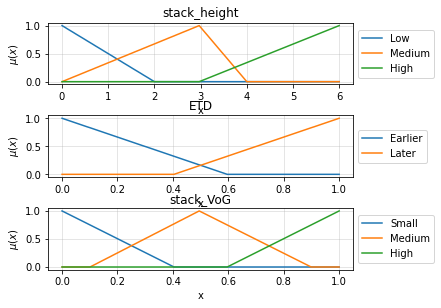

In [3]:
from fuzzy_logic.fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_logic.fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_logic.fuzzy_system import FuzzySystem

stack_height = FuzzyInputVariable('stack_height', 0, 6, 100)
stack_height.add_triangular('Low', 0, 0, 2)
stack_height.add_triangular('Medium', 0, 3, 4)
stack_height.add_triangular('High', 3, 6, 6)

etd = FuzzyInputVariable('ETD', 0, 1, 100)
etd.add_triangular('Earlier', 0, 0, 0.6)
etd.add_triangular('Later', 0.4, 1, 1)

stack_VoG = FuzzyOutputVariable('stack_VoG', 0, 1, 100)
stack_VoG.add_triangular('Small', 0, 0, 0.4)
stack_VoG.add_triangular('Medium', 0.1, 0.5, 0.9)
stack_VoG.add_triangular('High', 0.6, 1, 1)

system = FuzzySystem()
system.add_input_variable(stack_height)
system.add_input_variable(etd)
system.add_output_variable(stack_VoG)

system.add_rule(
        { 'stack_height':'Low',
                'ETD':'Later' },
        { 'stack_VoG':'Small'})

system.add_rule(
        { 'stack_height':'Medium',
                'ETD':'Later' },
        { 'stack_VoG':'Small'})

system.add_rule(
        { 'stack_height':'Medium',
                'ETD':'Earlier' },
        { 'stack_VoG':'High'})

system.add_rule(
        { 'stack_height':'High',
                'ETD':'Earlier' },
        { 'stack_VoG':'Medium'})

system.plot_system()


In [ ]:
from fuzzy_logic.fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_logic.fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_logic.fuzzy_system import FuzzySystem 

block_utilization = FuzzyInputVariable('block_utilization', 0, 1, 100)
block_utilization.add_triangular('Low', 0, 0, 0.4)
block_utilization.add_triangular('Medium', 0.1, 0.5, 0.9)
block_utilization.add_triangular('High', 0.6, 1, 1)

block_VoG = FuzzyOutputVariable('block_VoG', 0, 1, 100)
block_VoG.add_triangular('Low', 0, 0, 0.4)
block_VoG.add_triangular('Medium', 0, 0.5, 1)
block_VoG.add_triangular('High', 0.6, 1, 1)

system = FuzzySystem()
system.add_input_variable(block_utilization)
system.add_output_variable(block_VoG)

system.add_rule(
        { 'block_utilization':'Low'},
        { 'block_VoG':'High'})

system.add_rule(
        { 'block_utilization':'Medium'},
        { 'block_VoG':'Medium'})

system.add_rule(
        { 'block_utilization':'High'},
        { 'block_VoG':'Low'})

system.plot_system()